# Text Similarity

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/similarity](https://github.com/huseinzol05/Malaya/tree/master/example/similarity).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.37 s, sys: 626 ms, total: 5 s
Wall time: 4.32 s


In [4]:
string1 = 'Pemuda mogok lapar desak kerajaan prihatin isu iklim'
string2 = 'Perbincangan isu pembalakan perlu babit kerajaan negeri'
string3 = 'kerajaan perlu kisah isu iklim, pemuda mogok lapar'
string4 = 'Kerajaan dicadang tubuh jawatankuasa khas tangani isu alam sekitar'

In [5]:
news1 = 'Tun Dr Mahathir Mohamad mengakui pembubaran Parlimen bagi membolehkan pilihan raya diadakan tidak sesuai dilaksanakan pada masa ini berikutan isu COVID-19'
tweet1 = 'DrM sembang pilihan raya tak boleh buat sebab COVID 19'

### Doc2Vec

```python
def doc2vec(wordvector):
    """
    Doc2vec interface for text similarity.

    Parameters
    ----------
    wordvector : object
        malaya.wordvector.WordVector object.
        should have `get_vector_by_name` method.

    Returns
    -------
    result: malaya.similarity.Doc2VecSimilarity
    """
```

#### Using word2vec

I will use `load_news`, word2vec from wikipedia took a very long time. wikipedia much more accurate.

In [7]:
vocab_news, embedded_news = malaya.wordvector.load_news()
w2v = malaya.wordvector.load(embedded_news, vocab_news)
doc2vec = malaya.similarity.doc2vec(w2v)

#### predict batch of strings with probability

```python
def predict_proba(
    self,
    left_strings: List[str],
    right_strings: List[str],
    aggregation: Callable = np.mean,
    similarity: str = 'cosine',
    soft: bool = False,
):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    left_strings : list of str
    right_strings : list of str
    aggregation : Callable, optional (default=numpy.mean)
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.
    soft: bool, optional (default=False)
        word not inside word vector will replace with nearest word if True, else, will skip.

    Returns
    -------
    result: List[float]
    """
```

In [8]:
doc2vec.predict_proba([string1], [string2])

array([0.89971105])

In [9]:
doc2vec.predict_proba([string1, string2], [string3, string4])

array([0.91679387, 0.82348571])

#### visualize heatmap

```python
def heatmap(
    self,
    strings: List[str],
    aggregation: Callable = np.mean,
    similarity: str = 'cosine',
    soft: bool = False,
    visualize: bool = True,
    annotate: bool = True,
    figsize: Tuple[int, int] = (7, 7),
):
    """
    plot a heatmap based on output from bert similarity.

    Parameters
    ----------
    strings : list of str
        list of strings
    aggregation : Callable, optional (default=numpy.mean)
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.
    soft: bool, optional (default=True)
        word not inside word vector will replace with nearest word if True, else, will skip.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    result: list
        list of results.
    """
```

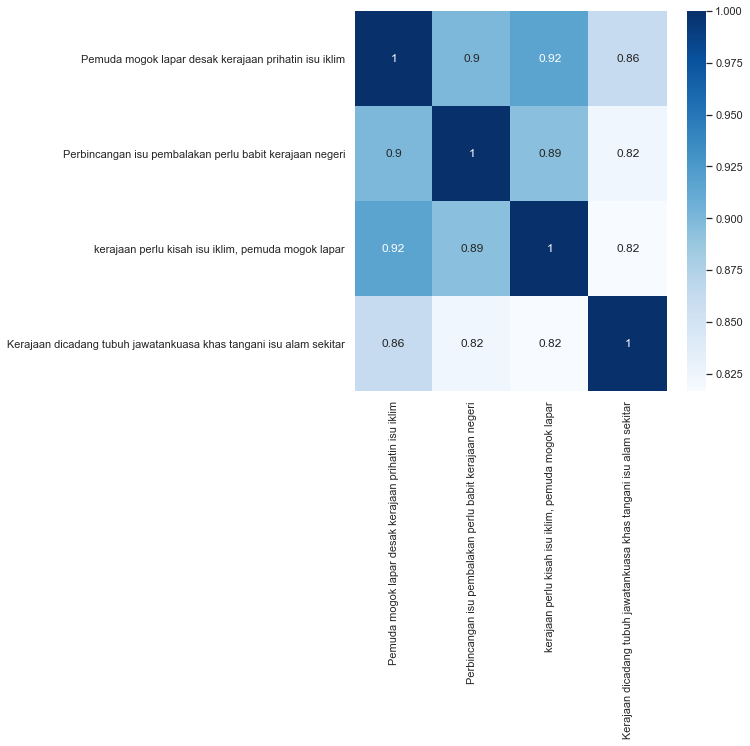

In [10]:
doc2vec.heatmap([string1, string2, string3, string4])

Different similarity function different percentage.

### Calculate similarity using deep encoder

We can use any encoder models provided by Malaya to use encoder similarity interface, example, BERT, XLNET, and skip-thought. Again, these encoder models not trained to do similarity classification, it just encode the strings into vector representation.

```python
def encoder(vectorizer):
    """
    Encoder interface for text similarity.

    Parameters
    ----------
    vectorizer : object
        encoder interface object, BERT, skip-thought, XLNET.

    Returns
    -------
    result: malaya.similarity.VectorizerSimilarity
    """
```

#### using xlnet

In [8]:
xlnet = malaya.transformer.load(model = 'xlnet')
encoder = malaya.similarity.encoder(xlnet)





INFO:tensorflow:memory input None
INFO:tensorflow:Use float type <dtype: 'float32'>

Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.




INFO:tensorflow:Restoring parameters from /Users/huseinzolkepli/Malaya/xlnet-model/base/xlnet-base/model.ckpt


#### predict for 2 strings with probability

```python
def predict_proba(
    self,
    left_strings: List[str],
    right_strings: List[str],
    similarity: str = 'cosine',
):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    left_strings : list of str
    right_strings : list of str
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.

    Returns
    -------
    result: List[float]
    """
```

In [9]:
encoder.predict_proba([string1], [string2])

array([0.81408405], dtype=float32)

In [10]:
encoder.predict_proba([string1, string2], [string3, string4])

array([0.56099266, 0.5458028 ], dtype=float32)

#### visualize heatmap

```python
def heatmap(
    self,
    strings: List[str],
    similarity: str = 'cosine',
    visualize: bool = True,
    annotate: bool = True,
    figsize: Tuple[int, int] = (7, 7),
):
    """
    plot a heatmap based on output from bert similarity.

    Parameters
    ----------
    strings : list of str
        list of strings.
    similarity : str, optional (default='mean')
        similarity supported. Allowed values:

        * ``'cosine'`` - cosine similarity.
        * ``'euclidean'`` - euclidean similarity.
        * ``'manhattan'`` - manhattan similarity.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    result: list
        list of results
    """
```

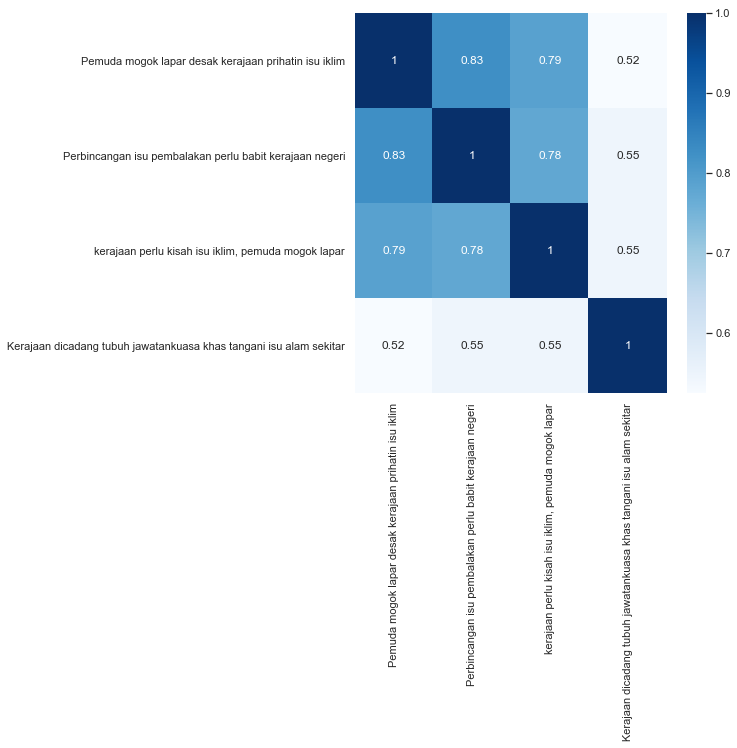

In [11]:
encoder.heatmap([string1, string2, string3, string4])

### List available Transformer models

In [11]:
malaya.similarity.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,423.4,111.0,0.88315,0.88656,0.88405
tiny-bert,56.6,15.0,0.87210,0.87546,0.87292
albert,48.3,12.8,0.87164,0.87146,0.87155
tiny-albert,21.9,6.0,0.82234,0.82383,0.82295
xlnet,448.7,119.0,0.80866,0.76775,0.77112
alxlnet,49.0,13.9,0.88756,0.88700,0.88727


We trained on [Quora Question Pairs](https://github.com/huseinzol05/Malay-Dataset#quora), [translated SNLI](https://github.com/huseinzol05/Malay-Dataset#snli) and [translated MNLI](https://github.com/huseinzol05/Malay-Dataset#mnli)

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#similarity

**You might want to use ALXLNET, a very small size, 49MB, but the accuracy is still on the top notch.**

### Load transformer model

```python
def transformer(model: str = 'bert', quantized: bool = False, **kwargs):
    """
    Load Transformer similarity model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:
        
        * if `bert` in model, will return `malaya.model.bert.SiameseBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.SiameseXLNET`.
    """
```

In [17]:
model = malaya.similarity.transformer(model = 'alxlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [18]:
quantized_model = malaya.similarity.transformer(model = 'alxlnet', quantized = True)

#### predict batch of strings with probability

```python
def predict_proba(self, strings_left: List[str], strings_right: List[str]):
    """
    calculate similarity for two different batch of texts.

    Parameters
    ----------
    string_left : List[str]
    string_right : List[str]

    Returns
    -------
    result : List[float]
    """
```

you need to give list of left strings, and list of right strings.

first left string will compare will first right string and so on.

similarity model only supported `predict_proba`.



In [14]:
model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.9979584 , 0.04179828, 0.8892512 , 0.98887056], dtype=float32)

In [15]:
quantized_model.predict_proba([string1, string2, news1, news1], [string3, string4, tweet1, string1])

array([0.9974437 , 0.00773132, 0.83024335, 0.43922293], dtype=float32)

#### visualize heatmap

```python
def heatmap(
    self,
    strings: List[str],
    visualize: bool = True,
    annotate: bool = True,
    figsize: Tuple[int, int] = (7, 7),
):
    """
    plot a heatmap based on output from similarity

    Parameters
    ----------
    strings : list of str
        list of strings.
    visualize : bool
        if True, it will render plt.show, else return data.
    figsize : tuple, (default=(7, 7))
        figure size for plot.

    Returns
    -------
    result: list
        list of results
    """
```

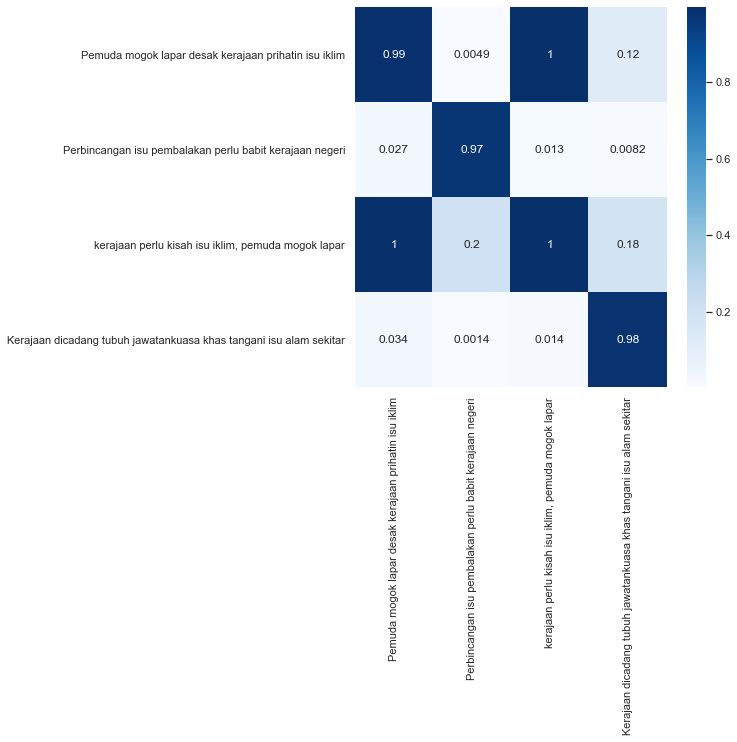

In [16]:
model.heatmap([string1, string2, string3, string4])

### Vectorize

Let say you want to visualize sentences in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str]):
    """
    Vectorize list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: np.array
    """
```

In [6]:
texts = [string1, string2, string3, string4, news1, tweet1]
r = quantized_model.vectorize(texts)

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(6, 2)

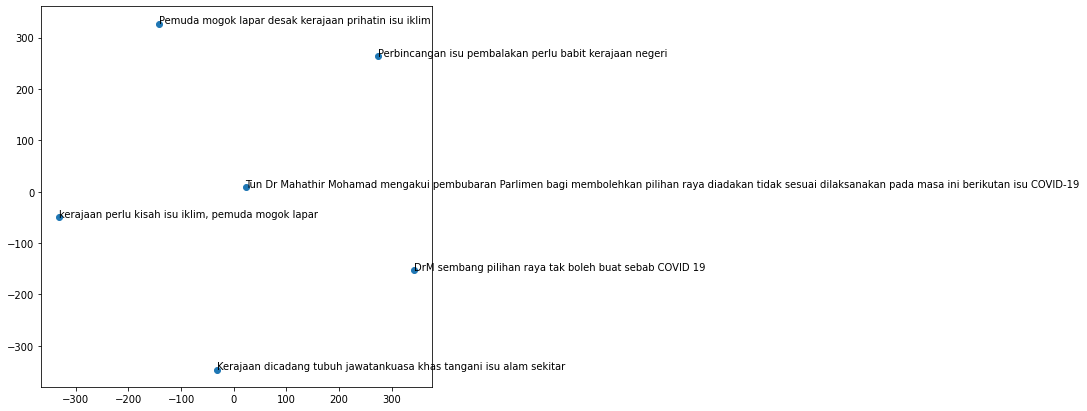

In [10]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

### Stacking models

More information, you can read at https://malaya.readthedocs.io/en/latest/Stack.html

If you want to stack zero-shot classification models, you need to pass labels using keyword parameter,

```python
malaya.stack.predict_stack([model1, model2], List[str], strings_right = List[str])
```

We will passed `strings_right` as `**kwargs`.

In [4]:
alxlnet = malaya.similarity.transformer(model = 'alxlnet')
albert = malaya.similarity.transformer(model = 'albert')
tiny_bert = malaya.similarity.transformer(model = 'tiny-bert')





INFO:tensorflow:loading sentence piece model


In [5]:
malaya.stack.predict_stack([alxlnet, albert, tiny_bert], [string1, string2, news1, news1], 
                           strings_right = [string3, string4, tweet1, string1])

array([0.99745977, 0.07261255, 0.16457608, 0.03985301], dtype=float32)